In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import ipywidgets as widgets

Create our values for C (class) which are 2 xy pairs that define a rectangle for which all positive examples are inside and all negitive examples are outside

In [541]:
# NEED WORK


def find_new_general_y(mask_min_y, mask_max_y, min_x_neg, max_x_neg, sorted_y):
    min_y_ind, max_y_ind = -1,0
    found_edge = False 
    while not found_edge:
        try:
            if min_x_neg[0]<sorted_y[mask_min_y][min_y_ind][0]<max_x_neg[0]:
                found_min_y = sorted_y[mask_min_y][min_y_ind]
                found_edge = True
            else: 
                min_y_ind -= 1
        except:
            print("Couldn't find new y's")
            found_edge = True
            found_min_y = sorted_y[mask_min_y][-1]
            
    found_edge = False 
    while not found_edge:
        try:
            if min_x_neg[0]<sorted_y[mask_max_y][max_y_ind][0]<max_x_neg[0]:
                found_max_y = sorted_y[mask_max_y][max_y_ind]
                found_edge = True
            else: 
                max_y_ind += 1
        except:
            print("Couldn't find new y's")
            found_edge = True
            found_max_y = sorted_y[mask_max_y][0]
    return found_min_y, found_max_y



def find_new_general_x(mask_min_x, mask_max_x, min_y_neg, max_y_neg, sorted_x):
    min_x_ind, max_x_ind = -1,0
    found_edge = False
    while not found_edge:
        if min_y_neg[1]<sorted_x[mask_min_x][min_x_ind][1]<max_y_neg[1]:
            found_min_x = sorted_x[mask_min_x][min_x_ind]
            found_edge = True
        else: 
            min_x_ind -= 1
            
    found_edge = False 
    while not found_edge: 
        if min_y_neg[1]<sorted_x[mask_max_x][max_x_ind][1]<max_y_neg[1]:
            found_max_x = sorted_x[mask_max_x][max_x_ind]
            found_edge = True
        else: 
            max_x_ind += 1
    return found_min_x, found_max_x

In [542]:
def create_rectange(min_x, min_y, max_x, max_y, color):
    return patches.Rectangle((min_x,min_y),max_x-min_x,max_y-min_y,linewidth=2,edgecolor=color,facecolor='none')

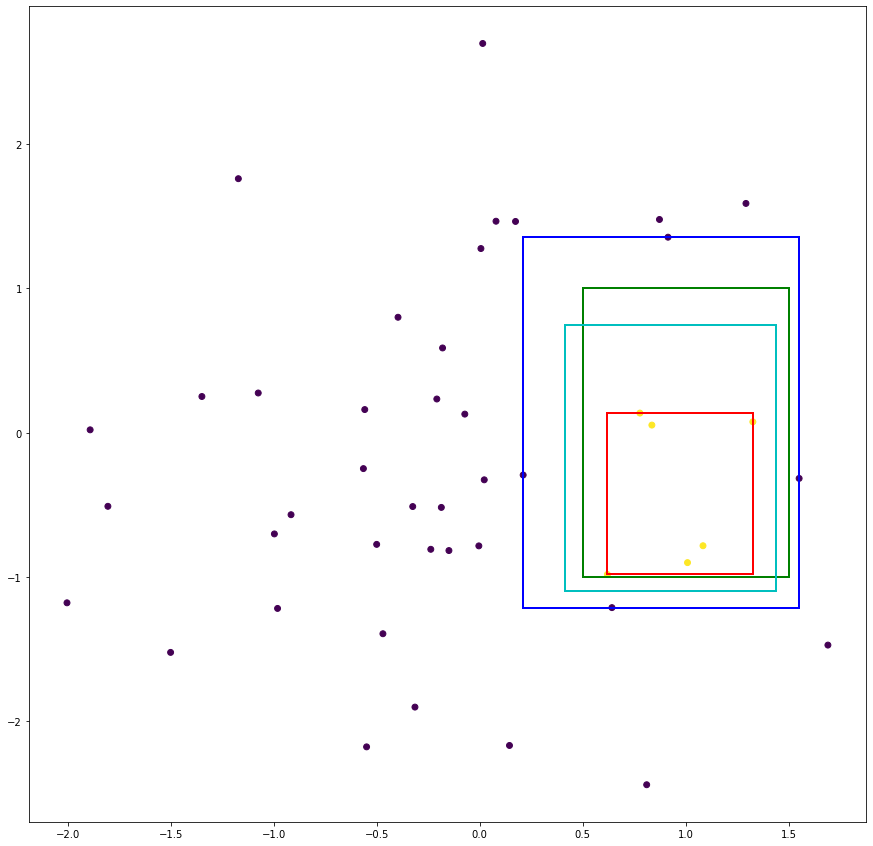

In [560]:
def create_vanpnik_dims(x_min, y_min, x_max, y_max, seed, num_points):
    
    #Create our empty array for our scatter plot and set random seed
    a = np.zeros(shape=(num_points,3))
    rng = np.random.RandomState(seed)
    
    #Create our C values evething in this rectangle is true everything outside is false
    p1 = np.array([x_min , y_min])
    p2 =  np.array([x_max , y_max])

    #Create our Scatter plot
    a[:,0] = rng.randn(num_points)
    a[:,1] = rng.randn(num_points)
    #Set all values inside C rectangle to true, everything else to false
    a[:,2] = [True if p2[0]>x[0]>p1[0] and p2[1]>x[1]>p1[1] else False for x in a[:,0:2] ]

    #Calculate our Specific Hypothisis defined by the smallest rectangle we can draw that contains all Positive examples and no negative examples
    mask = a[:,2] == 1
    positive = a[mask,:]

    max_x_pos = np.amax(positive[:,0])
    max_y_pos = np.amax(positive[:,1])

    min_x_pos = np.amin(positive[:,0])
    min_y_pos = np.amin(positive[:,1])

    specific_hypothosis = create_rectange(min_x_pos, min_y_pos, max_x_pos, max_y_pos, 'r')

    #Calculate our General Hypothisis defined by the Largest rectangle we can draw that contains all Postivie examples and no negative examples
    sorted_x =  a[a[:, 0].argsort()]
    mask_min_x = sorted_x[:,0] < min_x_pos
    mask_max_x = sorted_x[:,0] > max_x_pos
    min_x_neg = sorted_x[mask_min_x][-1]
    max_x_neg = sorted_x[mask_max_x][0]

    sorted_y =  a[a[:, 1].argsort()]
    mask_min_y = sorted_y[:,1] < min_y_pos
    mask_max_y = sorted_y[:,1] > max_y_pos

    found_min_y, found_max_y = find_new_general_y(mask_min_y, mask_max_y, min_x_neg, max_x_neg, sorted_y)
    found_min_x, found_max_x = find_new_general_x(mask_min_x, mask_max_x, found_min_y, found_max_y, sorted_x)

    found_min_y, found_max_y = find_new_general_y(mask_min_y, mask_max_y, found_min_x, found_max_x, sorted_y)
    found_min_x, found_max_x = find_new_general_x(mask_min_x, mask_max_x, found_min_y, found_max_y, sorted_x)
    found_min_y, found_max_y = find_new_general_y(mask_min_y, mask_max_y, found_min_x, found_max_x, sorted_y)
    

    
    
    min_x_neg = found_min_x[0]
    min_y_neg = found_min_y[1]
    max_x_neg = found_max_x[0]
    max_y_neg = found_max_y[1]
    
    general_hypothosis = create_rectange(min_x_neg, min_y_neg, max_x_neg, max_y_neg, 'b')

    #Calculate our Hpyothisis which is the difference between the Genearal and Specific Hypothosis 
    min_x_hy = (min_x_pos - min_x_neg)/2 + min_x_neg
    min_y_hy = (min_y_pos - min_y_neg)/2 + min_y_neg

    max_x_hy = (max_x_pos - max_x_neg)/2 + max_x_neg
    max_y_hy = (max_y_pos - max_y_neg)/2 + max_y_neg

    hypothosis = create_rectange(min_x_hy, min_y_hy, max_x_hy, max_y_hy, 'c')

    fig = plt.figure(figsize=(15,15)) 
    class_box = create_rectange(p1[0], p1[1], p2[0], p2[1], 'g')

    ax = fig.add_subplot(111) 
    ax.scatter(a[:,0], a[:,1], c=a[:,2], s=35)

    ax.add_patch(class_box)
    ax.add_patch(specific_hypothosis)
    ax.add_patch(general_hypothosis)
    ax.add_patch(hypothosis)
    
create_vanpnik_dims(.5, -1, 1.5, 1, 14, 45)

In [513]:


x_min_slide = widgets.FloatSlider(
         description='x_min:',
         value=0,
         min=-3,
         max=3,
         step=0.1,)
y_min_slide = widgets.FloatSlider(
         description='y_min:',
         value=0,
         min=-3,
         max=3,
         step=0.1,)

x_max_slide = widgets.FloatSlider(
         description='x_max:',
         value=1,
         min=-3,
         max=3,
         step=0.1,)

y_max_slide = widgets.FloatSlider(
         description='y_max:',
         value=1,
         min=-3,
         max=3,
         step=0.1,)


random_state_slide = widgets.IntSlider(
         description='Seed:',
         value=1,
         min=0,
         max=100,
         step=1,)


num_points_slide = widgets.IntSlider(
         description='num points:',
         value=40,
         min=4,
         max=200,
         step=1,)


menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')

In [516]:
box = widgets.VBox([x_min_slide, y_min_slide, x_max_slide, y_max_slide, random_state_slide, num_points_slide])
box

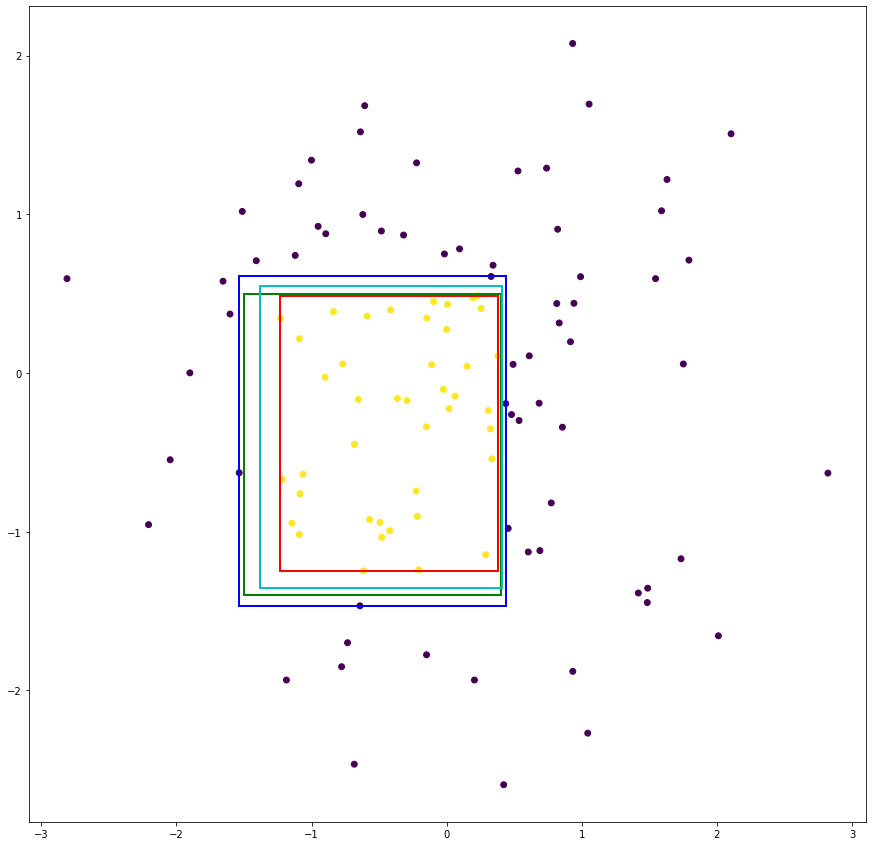

In [549]:
create_vanpnik_dims(x_min_slide.value, y_min_slide.value, x_max_slide.value , y_max_slide.value, random_state_slide.value, num_points_slide.value)